<ipython-input-12-d34553247924>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


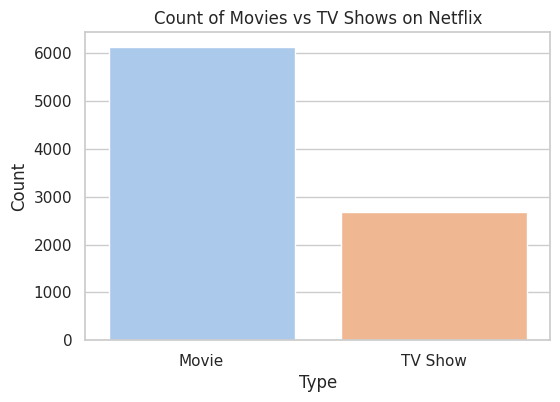

<ipython-input-12-d34553247924>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_data.values, y=genre_data.index, palette='muted')


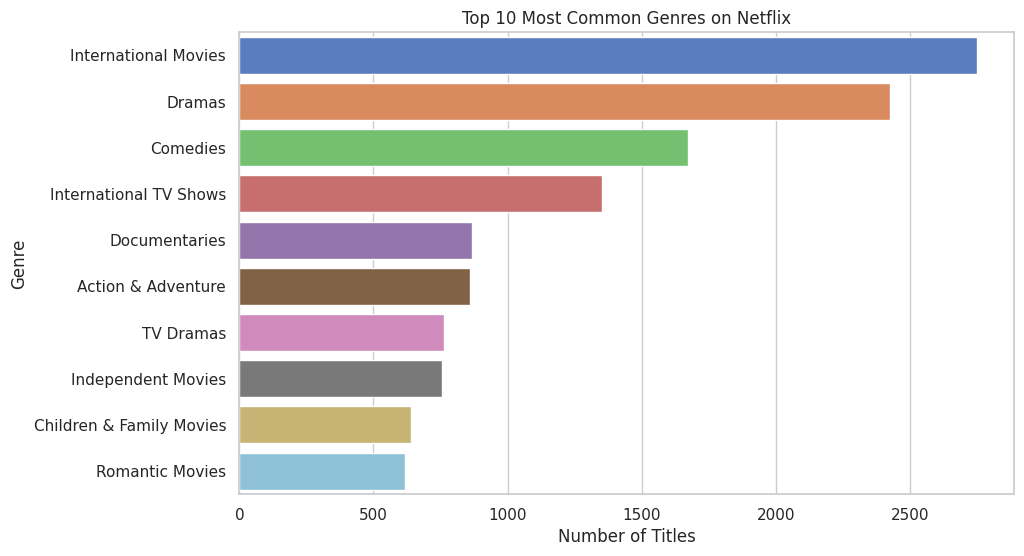

<ipython-input-12-d34553247924>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', palette='deep', order=sorted(df['year_added'].dropna().unique()))


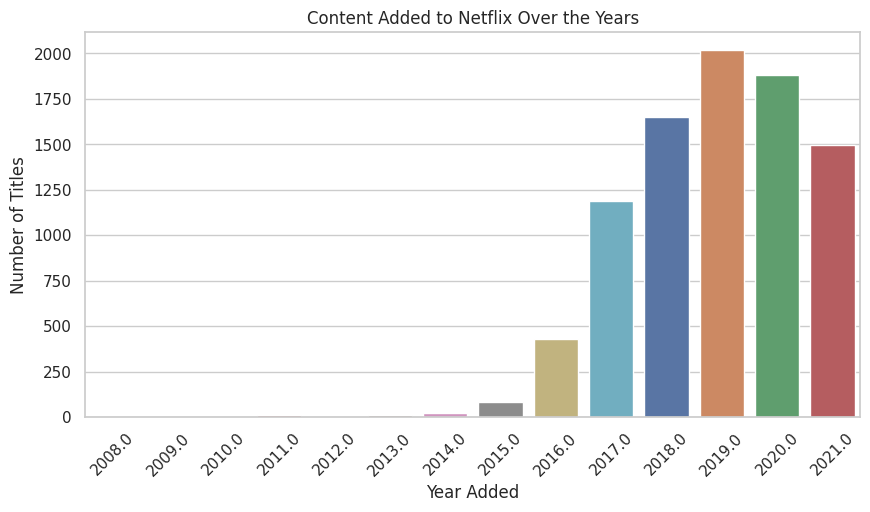

<ipython-input-12-d34553247924>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


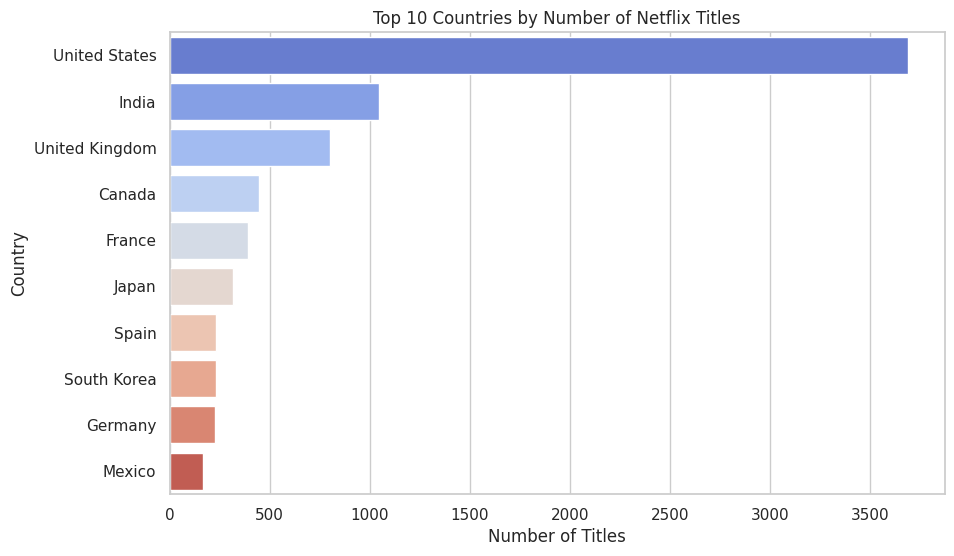

🎥 Wild District
🎥 Narcos: Mexico
🎥 El Cartel
🎥 El final del paraíso
🎥 The Great Heist


In [12]:
# ---------------------------------------
# 📦 Step 1: Loading and Cleaning the Data
# ---------------------------------------

import pandas as pd

# To Load the dataset
df = pd.read_csv('netflix_titles.csv')

# To show the first 5 rows
df.head()

# Check for missing values
df.isnull().sum()

# Fill missing values
df['cast'] = df['cast'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df = df.dropna(subset=['title', 'listed_in'])  # drop rows without title or genre

# To Show cleaned data preview
df.head()

# ---------------------------------------
# 📊 Step 2: Adding Data Visualizations
# ---------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Movie vs TV Show Count
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# To show top 10 Genres
genre_data = df['listed_in'].str.split(', ', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=genre_data.values, y=genre_data.index, palette='muted')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

# Adding Content Over the Years
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='mixed', errors='coerce')
df['year_added'] = df['date_added'].dt.year
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year_added', palette='deep', order=sorted(df['year_added'].dropna().unique()))
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

# Top 10 Countries by Content
top_countries = df['country'].dropna().str.split(', ', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# ---------------------------------------
# 🤖 Step 3: Build the Recommendation System
# ---------------------------------------

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Combine relevant columns into one string
df['combined'] = df['title'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']

# Converting the text to numbers
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined'])

# Finding similarity between all shows
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Creating a Series to map title to index
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

# Recommendation Function
def recommend(title, cosine_sim=cosine_sim):
    if title not in indices:
        return "Title not found"

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]  # top 5 recommendations

    show_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[show_indices]

# Example Usage
for show in recommend("Narcos"):
    print("🎥", show)
